# Análise de Dados da Vacinação no Recife

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('vacinados.csv', sep= ';', encoding= 'ISO-8859-1')

In [3]:
raw_data.head()

,cpf,nome,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210114,2,03/04/2021,DRIVE THRU - BIG BOMPREÃO - BOA VIAGEM
1,***.457.304-**,JOSÃ BARBOSA DINIZ,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,1,13/03/2021,DRIVE THRU GERALDÃO
2,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210093,2,01/04/2021,DRIVE THRU PARQUE DA MACAXEIRA
3,***.556.154-**,LUIZ CAMILO DE SANTANA,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,1,04/03/2021,DRIVE THRU PARQUE DA MACAXEIRA
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2,04/03/2021,CENTRO DE VACINAÃÃO PARQUE DE EXPOSIÃÃO


# Tratamento dos Dados

### Filtrando os Dados:

In [4]:
raw_data.columns

Index(['cpf', 'nome', 'grupo', 'vacina', 'lote', 'dose', 'data_vacinacao',
       'local_vacinacao'],
      dtype='object')

In [5]:
# Criando um dataframe apenas com as colunas selecionadas
data = raw_data.loc[:, ['cpf', 'grupo', 'vacina', 'dose', 'data_vacinacao']]
data.head(3)

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2,03/04/2021
1,***.457.304-**,TRABALHADORES DA SAÃDE,1 - CORONAVAC - SINOVAC (BUTANTAN),1,13/03/2021
2,***.556.154-**,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),2,01/04/2021


### Renomeando Vacinas:

In [6]:
data['vacina'].unique()

array(['1 - CORONAVAC - SINOVAC (BUTANTAN)',
       '2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
       '3 - COMIRNATY (PFIZER)', '1- CORONAVAC - SINOVAC (BUTANTAN)'],
      dtype=object)

In [7]:
data['vacina'] = data['vacina'].replace(['1 - CORONAVAC - SINOVAC (BUTANTAN)', '1- CORONAVAC - SINOVAC (BUTANTAN)'], 'CORONAVAC')

In [8]:
data['vacina'] = data['vacina'].replace(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)', ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'], 'CHADOX1NCOV-19')

In [9]:
data['vacina'] = data['vacina'].replace(['3 - COMIRNATY (PFIZER)'], 'COMIRNATY')

In [10]:
data['vacina'].unique()

array(['CORONAVAC', 'CHADOX1NCOV-19', 'COMIRNATY'], dtype=object)

### Renomeando os Grupos:

In [11]:
data['grupo'].unique()

array(['TRABALHADORES DA SAÃ\x9aDE', 'IDOSOS', 'OUTRAS PRIORIDADES',
       'PESSOAS COM COMORBIDADES', 'TRABALHADORES DA EDUCAÃ\x87Ã\x83O',
       'GESTANTES E PUÃ\x89RPERAS',
       'GESTANTES E PUÃ\x89RPERAS NÃ\x83O RESIDENTES EM RECIFE'],
      dtype=object)

In [12]:
data['grupo'] = data['grupo'].replace(['PESSOAS COM COMORBIDADES'], 'COMORBIDADES')

In [13]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA SAÃDE'], 'SAÚDE')

In [14]:
data['grupo'] = data['grupo'].replace(['OUTRAS PRIORIDADES'], 'OUTROS')

In [15]:
data['grupo'] = data['grupo'].replace(['TRABALHADORES DA EDUCAÃ\x87Ã\x83O'], 'EDUCAÇÃO')

In [16]:
data['grupo'] = data['grupo'].replace(['GRÃ\x81VIDAS E PUÃ\x89RPERAS', 'GESTANTES E PUÃ\x89RPERAS NÃ\x83O RESIDENTES EM RECIFE', 'GESTANTES E PUÃ\x89RPERAS'], 'GRÁVIDAS E PUÉRPERAS')

In [17]:
data['grupo'].unique()

array(['SAÚDE', 'IDOSOS', 'OUTROS', 'COMORBIDADES', 'EDUCAÇÃO',
       'GRÁVIDAS E PUÉRPERAS'], dtype=object)

In [18]:
data.head(3)

,cpf,grupo,vacina,dose,data_vacinacao
0,***.457.304-**,SAÚDE,CORONAVAC,2,03/04/2021
1,***.457.304-**,SAÚDE,CORONAVAC,1,13/03/2021
2,***.556.154-**,IDOSOS,CORONAVAC,2,01/04/2021


# Analisando Queries com Histogramas
##### *A histogram is an approximate representation of the distribution of numerical data.*

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histograma com a proporção da classe dose:

In [20]:
# Criando um dataframe com a proporção da classe dose
doses_proportion = data['dose'].value_counts(normalize= True).reset_index()
doses_proportion.columns = ['dose', 'proporção']
doses_proportion

,dose,proporção
0,1,0.648749
1,2,0.351251


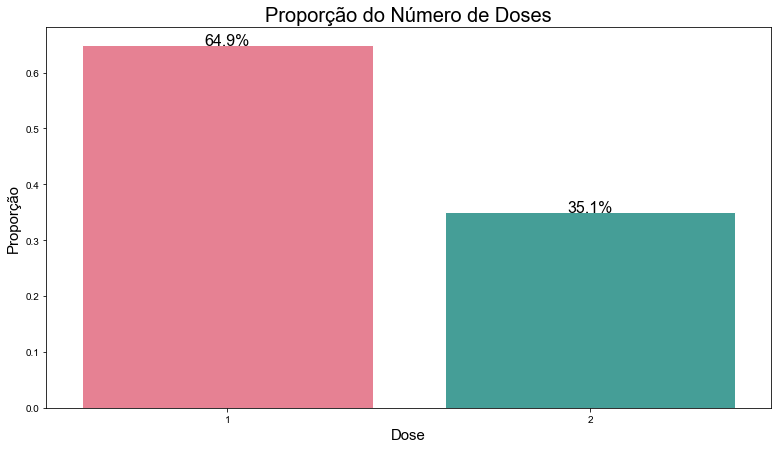

In [21]:
# Criando figura e eixos
fig, ax = plt.subplots(figsize=(13, 7))

# Mudando o estilo de fundo
sns.set_style('darkgrid')

# Criando uma palheta de 2 cores
sns.set_palette(sns.color_palette('husl', 2))

# Criando o gráfico 
sns.barplot(x= 'dose', y= 'proporção', data= doses_proportion, ax= ax)

# Adicionando os títulos e mudando o tamanho das fontes
plt.title('Proporção do Número de Doses', fontsize= 20)
plt.xlabel('Dose', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

# Adicionando os valores acima da barra
for index, row in doses_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

## *Possível interpretação: Infere-se que a quantidade de primeiras doses é maior devido a diminuição da taxa de vacinação nesse mês por falta de vacinas.*

### Histograma com a proporção da classe vacina:

In [22]:
# Criando um dataframe com a proporção da classe vacina
vaccines_proportion = data['vacina'].value_counts(normalize= True).reset_index()
vaccines_proportion.columns = ['vacina', 'proporção']
vaccines_proportion

,vacina,proporção
0,CORONAVAC,0.678302
1,CHADOX1NCOV-19,0.297511
2,COMIRNATY,0.024187


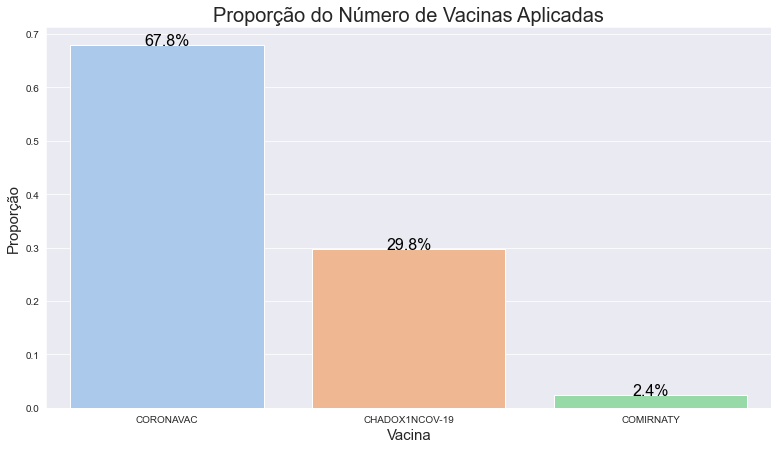

In [23]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('pastel', 3))

sns.barplot(x= 'vacina', y= 'proporção', data= vaccines_proportion, ax= ax)

plt.title('Proporção do Número de Vacinas Aplicadas', fontsize= 20)
plt.xlabel('Vacina', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in vaccines_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

## *Possível interpretação: A alta adesão a vacina brasileira ressalta o poder da pesquisa brasileira.*

### Histograma com a proporção da classe grupo:

In [24]:
# Criando um dataframe com a proporção da classe grupo
groups_proportion = data['grupo'].value_counts(normalize= True).reset_index()
groups_proportion.columns = ['grupo', 'proporção']
groups_proportion

,grupo,proporção
0,IDOSOS,0.696387
1,SAÚDE,0.243095
2,COMORBIDADES,0.025862
3,EDUCAÇÃO,0.021610
4,GRÁVIDAS E PUÉRPERAS,0.009313
5,OUTROS,0.003734


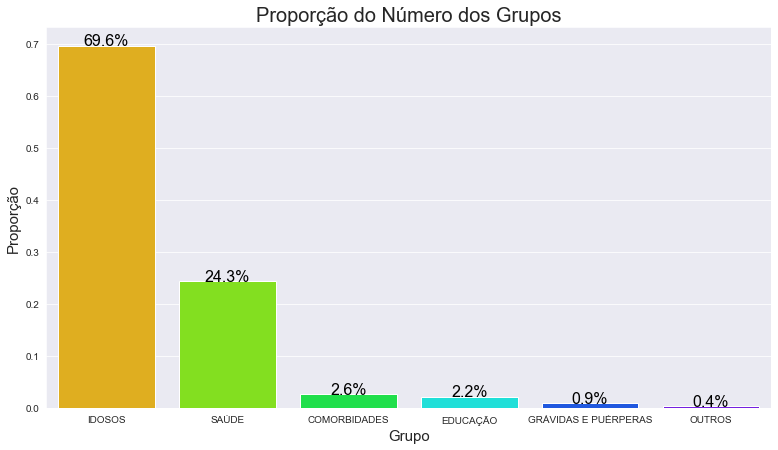

In [25]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('hsv', 7))

sns.barplot(x= 'grupo', y= 'proporção', data= groups_proportion, ax= ax)

plt.title('Proporção do Número dos Grupos', fontsize= 20)
plt.xlabel('Grupo', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in groups_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

## *Possível interpretação: A conclusão óbvia é que os idosos são o grupo prioritário, mas note que o grupo dos profissionais de saúde vem logo em seguida e esse fato se da devido a alta taxa de mortalidade nesse grupo, também.*

# *Groupwise Analysis*

### A vacina mais usada em cada grupo:

In [26]:
data.groupby('grupo').apply(lambda df: df['vacina'].value_counts().idxmax())

grupo
COMORBIDADES            CHADOX1NCOV-19
EDUCAÇÃO                CHADOX1NCOV-19
GRÁVIDAS E PUÉRPERAS         COMIRNATY
IDOSOS                       CORONAVAC
OUTROS                       CORONAVAC
SAÚDE                        CORONAVAC
dtype: object

### Média de doses tomadas em cada grupo:

In [27]:
data.groupby('grupo').apply(lambda df: df['dose'].mean())

grupo
COMORBIDADES            1.000000
EDUCAÇÃO                1.000000
GRÁVIDAS E PUÉRPERAS    1.000000
IDOSOS                  1.366598
OUTROS                  1.202782
SAÚDE                   1.391617
dtype: float64

### Quantidade de tipo de vacina aplicada em cada grupo:

In [28]:
data.groupby(['grupo', 'vacina']).size()

grupo                 vacina        
COMORBIDADES          CHADOX1NCOV-19      8071
                      COMIRNATY           7356
                      CORONAVAC             13
EDUCAÇÃO              CHADOX1NCOV-19     12763
                      COMIRNATY            126
                      CORONAVAC             13
GRÁVIDAS E PUÉRPERAS  CHADOX1NCOV-19         4
                      COMIRNATY           5555
                      CORONAVAC              1
IDOSOS                CHADOX1NCOV-19    127318
                      COMIRNATY            175
                      CORONAVAC         288268
OUTROS                CHADOX1NCOV-19       396
                      COMIRNATY            899
                      CORONAVAC            934
SAÚDE                 CHADOX1NCOV-19     29070
                      COMIRNATY            329
                      CORONAVAC         115735
dtype: int64